**Model Evaluation and Generalization in Machine Learning**

This code imports the files module from Google Colab and uses the upload() function to open a file selection dialog. It allows the user to upload files from their local computer to the colab environment, so they can be accessed and used in the notebook.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_1_train.csv to Dataset_1_train.csv
Saving Dataset_1_test.csv to Dataset_1_test.csv
Saving Dataset_1_valid.csv to Dataset_1_valid.csv


1-1) This code reads three CSV datasets (Dataset_1_train.csv, Dataset_1_valid.csv, and Dataset_1_test.csv) into Pandas DataFrames and converts them into NumPy arrays. From the training dataset, it extracts the input values (x1) and target values (y1). Then, it calculates the parameters w0 (intercept) and w1 (slope) of a simple linear regression model using the closed-form formula based on the least squares method. Finally, it prints the regression coefficients as an array w = [w0, w1].

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
f1 = pd.read_csv('Dataset_1_train.csv')
f2 = pd.read_csv('Dataset_1_valid.csv')
f3 = pd.read_csv('Dataset_1_test.csv')
data1 = f1.to_numpy()
data2 = f2.to_numpy()
data3 = f3.to_numpy()
x1 = data1[:, 0]
y1 = data1[:, 1]
x2 = data2[:, 0]
y2 = data2[:, 1]
x3 = data3[:, 0]
y3 = data3[:, 1]
n = len(x1)
xi = np.sum(x1)
yi = np.sum(y1)
xi2 = np.sum(x1**2)
xy = np.sum(x1*y1)
w1= (n*xy-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
w = np.array([w0,w1])
print(w)

[-0.94173761 10.85600699]


1-2) This code calculates the Root Mean Squared Error (RMSE) for training, validation, and test datasets. First, it predicts the outputs using a simple linear model Y_pred = w[0] + w[1]*x. Then, it computes the RMSE by comparing the predicted values with the actual targets. Finally, it prints the RMSE for each dataset, along with the model weights w. This allows us to evaluate how well the model fits the training data and generalizes to unseen data.

RMSE = √[ Σ(Y_pred – Y_true)² / n ].

In [4]:
def RMSE_Training(y1,y1_pred):
    return np.sqrt(np.mean((y1-y1_pred)**2))
Y1_pred = w[0]+w[1]*x1
print(f"RMSE_Train: {RMSE_Training(y1, Y1_pred)}")
def RMSE_Valid(y2,y2_pred):
    return np.sqrt(np.mean((y2-y2_pred)**2))
Y2_pred = w[0]+w[1]*x2
print(f"RMSE_Valid: {RMSE_Valid(y2, Y2_pred)}")
def RMSE_Test(y3,y3_pred):
    return np.sqrt(np.mean((y3-y3_pred)**2))
Y3_pred = w[0]+w[1]*x3
print(f"RMSE_Test: {RMSE_Test(y3, Y3_pred)}")

RMSE_Train: 5.43152976578808
RMSE_Valid: 5.9292491068151785
RMSE_Test: 5.0852898384254175


1-3) This section visualizes the training, validation, and test datasets along with the predictions from the linear model. For each dataset, actual data points are displayed using scatter plots, while predicted values are shown as lines. By comparing the plots, we can assess how well the model fits the training data and how its performance generalizes to the validation and test sets. Differences in the alignment between points and prediction lines indicate variations in model accuracy across datasets.

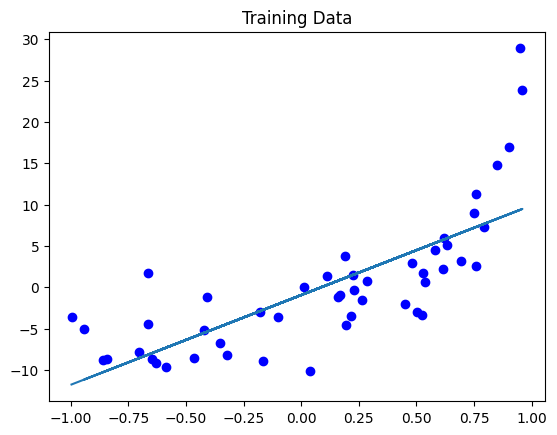

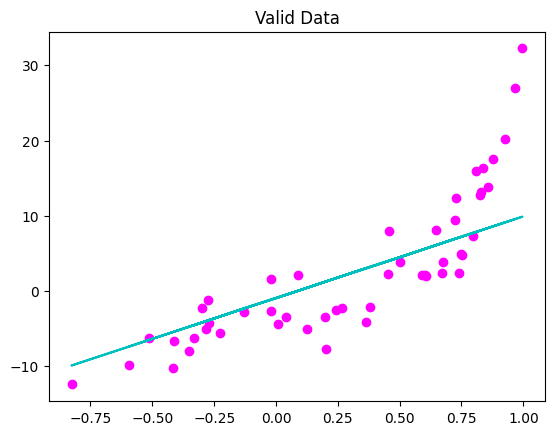

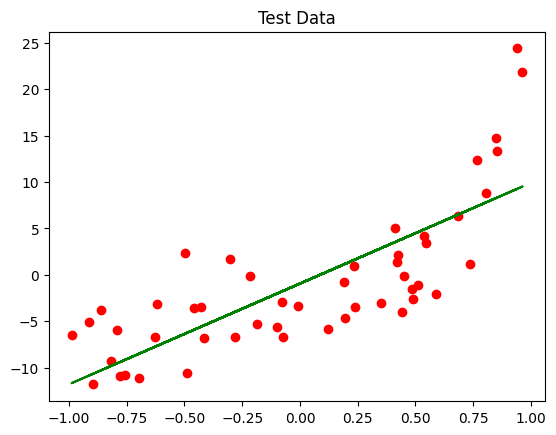

In [5]:
plt.scatter(x1,y1,color ='blue')
plt.plot(x1,Y1_pred,'-')
plt.title("Training Data")
plt.show()
plt.scatter(x2,y2,color ='magenta')
plt.plot(x2,Y2_pred,'c-')
plt.title("Valid Data")
plt.show()
plt.scatter(x3,y3,color ='red')
plt.plot(x3,Y3_pred,'g-')
plt.title("Test Data")
plt.show()

2-1) This section investigates how polynomial regression models of different degrees (1 to 9) perform on the training and validation datasets. For each degree
**D**, polynomial features are created, the model is fitted to the training data, and the RMSE is calculated for both the training and validation sets. The RMSE values for the training and validation data are then plotted as a function of degree D to show how the error changes with increasing degree.

The resulting plot shows that RMSE on the training set decreases consistently as the polynomial degree increases, indicating that higher-degree polynomials fit the training data more closely. The RMSE on the validation set decreases initially, reaching its minimum around degree 4, and then starts to slightly increase for higher degrees. This pattern indicates that polynomial degrees higher than 4 begin to overfit the training data, capturing noise rather than meaningful trends, which reduces generalization performance. **Therefore, degree 4 appears to be the optimal choice, achieving a good balance between accurate training fit and reliable performance on unseen validation data.**

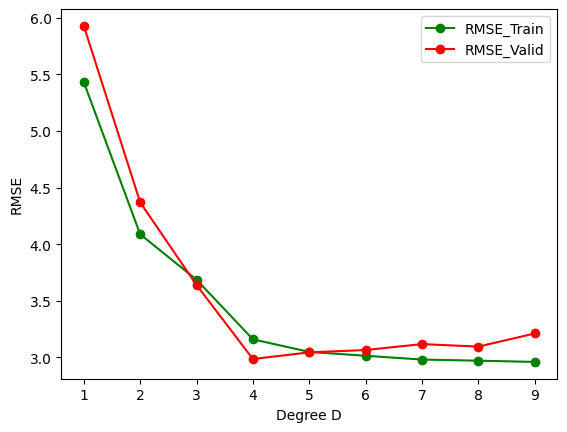

In [ ]:
def RMSE_Tr(y1,y1_pred):
    return np.sqrt(np.mean((y1-y1_pred)**2))
def RMSE_V(y2,y2_pred):
    return np.sqrt(np.mean((y2-y2_pred)**2))

  x_poly = np.c_[np.ones(n)]
  x_poly2 = np.c_[np.ones(len(x2))]
  for i in range(1,D+1):
    x_poly = np.c_[x_poly,x1**i]
    x_poly2 = np.c_[x_poly2,x2**i]
  w = la.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y1)
  Y1_pred = x_poly.dot(w.T)
  xT = RMSE_Tr(Y1_pred,y1)
  Y2_pred = x_poly2.dot(w.T)
  xV = RMSE_V(Y2_pred,y2)
  D+=1
  rmse_Train.append(xT)
  rmse_valid.append(xV)
plt.plot(range(1, 10), rmse_Train, 'go-', label='RMSE_Train')
plt.plot(range(1, 10), rmse_valid, 'ro-', label='RMSE_Valid')
plt.xlabel("Degree D")
plt.ylabel("RMSE")
plt.legend()
plt.show()

3-1) This code performs polynomial regression with a degree of 4 on a given dataset. First, it constructs polynomial features for the training data, including a bias term, and calculates the weight vector using the closed-form solution of linear regression. Then, it visualizes the results by plotting the training data points in blue and the fitted polynomial curve over the same range. The same polynomial model is applied to the validation and test data, where the validation points are shown in magenta with the fitted curve in cyan, and the test points are shown in red with the curve in green. These plots help to evaluate how well the polynomial model fits the training data and how it generalizes to unseen validation and test data.

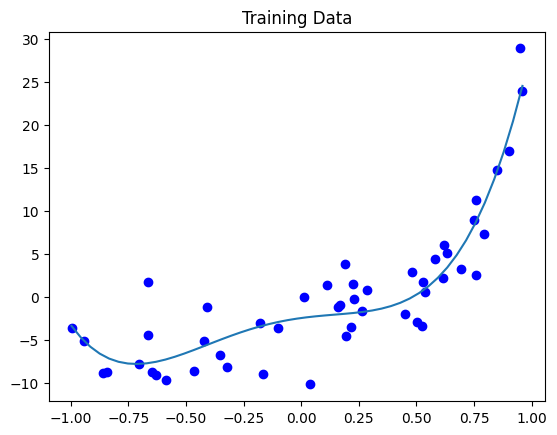

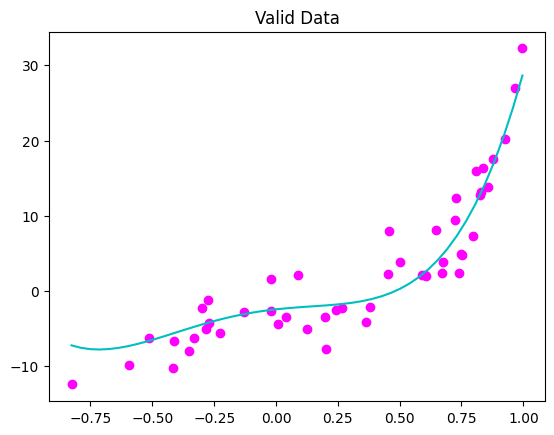

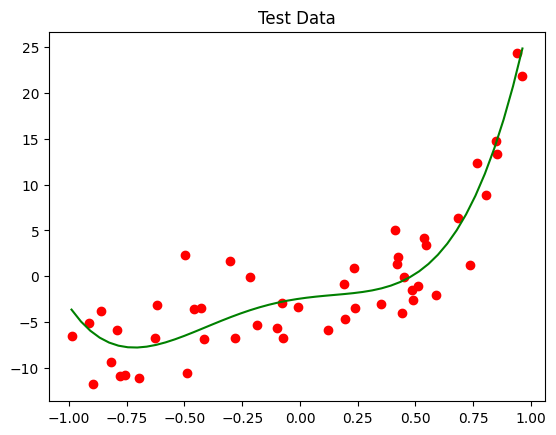

In [10]:
Db = 4
x_poly = np.c_[np.ones(n)]
for i in range(1,Db+1):
  x_poly = np.c_[x_poly,x1**i]
w = la.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y1)
x_fit1 = np.linspace(np.min(x1),np.max(x1),n)
x_fit_poly1 = np.c_[np.ones(len(x_fit1))]
for i in range(1,Db+1):
  x_fit_poly1 = np.c_[x_fit_poly1,x_fit1**i]
plt.scatter(x1,y1,color ='blue')
plt.plot(x_fit1,x_fit_poly1.dot(w),'-')
plt.title("Training Data")
plt.show()
x_fit2 = np.linspace(np.min(x2),np.max(x2),len(x2))
x_fit_poly2 = np.c_[np.ones(len(x_fit2))]
for i in range(1,Db+1):
  x_fit_poly2 = np.c_[x_fit_poly2,x_fit2**i]
plt.scatter(x2,y2,color ='magenta')
plt.plot(x_fit2,x_fit_poly2.dot(w),'c-')
plt.title("Valid Data")
plt.show()
x_fit3 = np.linspace(np.min(x3),np.max(x3),len(x3))
x_fit_poly3 = np.c_[np.ones(len(x_fit3))]
for i in range(1,Db+1):
  x_fit_poly3 = np.c_[x_fit_poly3,x_fit3**i]
plt.scatter(x3,y3,color ='red')
plt.plot(x_fit3,x_fit_poly3.dot(w),'g-')
plt.title("Test Data")
plt.show()

**Conclusion**

The polynomial regression model of degree 4 demonstrates a strong ability to capture the underlying nonlinear relationship between the input and output variables in the training dataset. The fitted curve closely follows the training data distribution, indicating that the model effectively minimizes the training error.


When applied to the validation data, the model maintains a similar shape and trend, suggesting a good generalization capability. The alignment between the validation points and the predicted curve implies that the model is not significantly overfitting to the training set, as it preserves predictive accuracy on unseen samples from the same distribution.
For the test data, the fitted curve continues to reflect the underlying functional relationship, although with slightly larger deviations in certain regions, which is expected due to natural variability in unseen data. The consistency of the curve across training, validation, and test sets indicates that the chosen polynomial degree is appropriate for balancing bias and variance, capturing essential nonlinearities without introducing excessive overfitting.


**In conclusion,the results suggest that the degree-4 polynomial regression model achieves a good trade-off between model complexity and generalization, making it suitable for modeling the given dataset.**